In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf

from core.pre_processing import build_ohio_dataset, get_patient_window

In [10]:
root_path = "models"

SAMPL_FREQ = 5

PATIENTS_2018 = ["559", "563", "570", "575", "588", "591"]
PATIENTS_2020 = ["540", "544", "552", "567", "584", "596"]

In [7]:
# 6 steps -> 30 minutes prediction horizon
PH = 6
batch_size = 256

# 30 minutes of input
input_len = 30

features = ["Time", "Glucose", "Rapid Insulin sub_tissue", "Carbohydrates gut", "finger_stick"]

In [17]:
# Load dataset
dataset_2020 = build_ohio_dataset("2020")

Using time to peak: 100 for patient 540
Identified 22 gaps for train set of 540
Identified 8 gaps for val set of 540
Identified 8 gaps for test set of 540
Using time to peak: 100 for patient 544
Identified 15 gaps for train set of 544
Identified 7 gaps for val set of 544
Identified 6 gaps for test set of 544
Using time to peak: 100 for patient 552
Identified 34 gaps for train set of 552
Identified 10 gaps for val set of 552
Identified 10 gaps for test set of 552
Empty carbs
Using time to peak: 100 for patient 567
Identified 46 gaps for train set of 567
Identified 10 gaps for val set of 567
Identified 11 gaps for test set of 567
Using time to peak: 100 for patient 584
Identified 45 gaps for train set of 584
Identified 14 gaps for val set of 584
Identified 15 gaps for test set of 584
Using time to peak: 100 for patient 596
Identified 23 gaps for train set of 596
Identified 2 gaps for val set of 596
Identified 6 gaps for test set of 596


In [18]:
# Patient ID
dataset_2020[2][3]

'552'

In [19]:
patient_window = get_patient_window(dataset_2020[2][:-1], features, input_len // SAMPL_FREQ, 1, PH, drop_noisy=False, batch_size=256, min_max_scale=False)

In [20]:
lmu_model = tf.keras.models.load_model(os.path.join(root_path, "lmu_2020_ph30min_1"))

In [40]:
all_predictions = []
all_targets = []
start_at = 70
end_at = 214
idx = 0
for batch in patient_window.test:
    if idx < start_at:
       idx += 1
       continue
    if idx >= end_at:
        break

    inputs, targets = batch
    targets = targets.numpy().flatten()
    predictions = lmu_model.predict(inputs, verbose=0).flatten()

    all_predictions.extend(predictions)
    all_targets.extend(targets)

    idx += 1

In [41]:
len(all_targets)

144

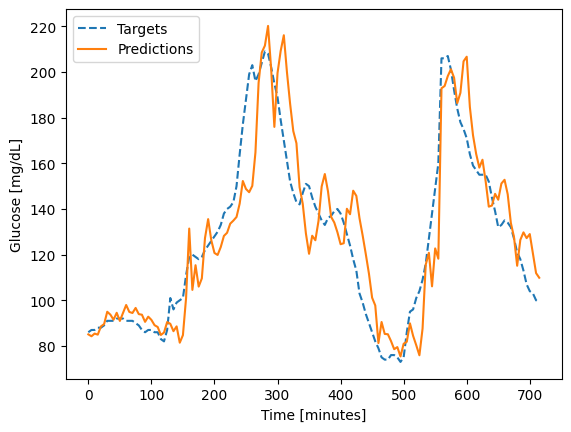

In [42]:
time_steps = [i for i in range(0, len(all_targets)*5, 5)]

# Plot input vs targets
fig, ax = plt.subplots()
ax.plot(time_steps, all_targets, label="Targets", linestyle="dashed")
ax.plot(time_steps, all_predictions, label="Predictions")
ax.set(xlabel="Time [minutes]", ylabel="Glucose [mg/dL]")
ax.legend()